In [ ]:
from google.colab import drive

# Google Drive 마운트
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install tensorflow tensorflow-datasets librosa soundfile


In [ ]:
# @title
# 최초 1회만 실행 압축해제
import zipfile

# Define paths
data1_zip_path = '/content/drive/My Drive/Data/archive.zip'
data2_zip_path ='/content/drive/My Drive/Data/Audio_Song_Actors_01-24.zip'

extract_path1 = '/content/drive/My Drive/Data/First'
extract_path2 = '/content/drive/My Drive/Data/First'

# Extract the first dataset
with zipfile.ZipFile(data1_zip_path, 'r') as zip_ref:
   zip_ref.extractall(extract_path1)

# Extract the second dataset
with zipfile.ZipFile(data2_zip_path, 'r') as zip_ref:
   zip_ref.extractall(extract_path2)

KeyboardInterrupt: 

In [ ]:
# Looking at file name and extract information about the Class Label

import glob

# Google Drive 내의 data 폴더에 있는 .wav 파일을 불러오는 코드
filenames = glob.glob("/content/drive/MyDrive/Data/First/Actor_*/**/*.wav", recursive=True)

# 파일 리스트의 길이를 확인합니다.
if len(filenames) == 0:
    print("파일이 로드되지 않았습니다. 경로를 확인하세요.")
else:
    print(f"발견된 파일 개수: {len(filenames)}")
    print(filenames[:5])  # 첫 5개의 파일만 출력


발견된 파일 개수: 2452
['/content/drive/MyDrive/Data/First/Actor_01/03-01-03-02-02-02-01.wav', '/content/drive/MyDrive/Data/First/Actor_01/03-01-04-01-01-01-01.wav', '/content/drive/MyDrive/Data/First/Actor_01/03-01-04-01-02-02-01.wav', '/content/drive/MyDrive/Data/First/Actor_01/03-01-04-01-02-01-01.wav', '/content/drive/MyDrive/Data/First/Actor_01/03-01-04-01-01-02-01.wav']


    Audio-only files of all actors (01-24) are available as two separate zip files (~200 MB each):

    Speech file (Audio_Speech_Actors_01-24.zip, 215 MB) contains 1440 files: 60 trials per actor x 24 actors = 1440.
    Song file (Audio_Song_Actors_01-24.zip, 198 MB) contains 1012 files: 44 trials per actor x 23 actors = 1012.
    
    
    Each of the RAVDESS files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 02-01-06-01-02-01-12.mp4). These identifiers define the stimulus characteristics:

    Filename identifiers
        Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
        Vocal channel (01 = speech, 02 = song).
        Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
        Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
        Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
        Repetition (01 = 1st repetition, 02 = 2nd repetition).
        Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

    Filename example: 02-01-06-01-02-01-12.mp4
        Video-only (02)
        Speech (01)
        Fearful (06)
        Normal intensity (01)
        Statement "dogs" (02)
        1st Repetition (01)
        12th Actor (12)
        Female, as the actor ID number is even.

In [ ]:
from collections import Counter # collections에서 Counter를 import 합니다.

emotions_id={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

label_counts = dict(Counter([x.split('/')[-1].split('-')[2] for x in filenames]))
label_counts = {emotions_id[k]:v for k,v in label_counts.items()}
label_counts

{'happy': 376,
 'sad': 376,
 'angry': 376,
 'fearful': 376,
 'disgust': 192,
 'surprised': 192,
 'neutral': 188,
 'calm': 376}

In [ ]:
# Lets visualise how a single sound File looks like and its features
fid = filenames[200]
print(fid)

/content/drive/MyDrive/Data/First/Actor_02/03-02-06-01-01-02-02.wav


In [ ]:

!pip install resampy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 58.5 MB/s eta 0:00:00


In [ ]:
!pip install librosa

In [ ]:
import os
import glob
import librosa
import soundfile as sf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

In [ ]:
import soundfile as sf # Make sure the soundfile module is imported as sf

sf = sf.SoundFile(fid) # Use sf to call SoundFile from the soundfile module
data = sf.read(dtype="float32")
sample_rate = sf.samplerate

In [ ]:
print(f"First 5 filenames: {filenames[:5]}")

First 5 filenames: ['/content/drive/MyDrive/Data/First/Actor_01/03-01-03-02-02-02-01.wav', '/content/drive/MyDrive/Data/First/Actor_01/03-01-04-01-01-01-01.wav', '/content/drive/MyDrive/Data/First/Actor_01/03-01-04-01-02-02-01.wav', '/content/drive/MyDrive/Data/First/Actor_01/03-01-04-01-02-01-01.wav', '/content/drive/MyDrive/Data/First/Actor_01/03-01-04-01-01-02-01.wav']


In [ ]:
sf

SoundFile('/content/drive/MyDrive/Data/First/Actor_02/03-02-06-01-01-02-02.wav', mode='r', samplerate=48000, channels=1, format='WAV', subtype='PCM_16', endian='FILE')

In [ ]:
data[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
duration = data.shape[0]/sample_rate
duration

4.804791666666667

In [ ]:
sample_rate

48000

In [ ]:
import IPython.display as ipd
ipd.Audio(fid)

### EXPLORATION

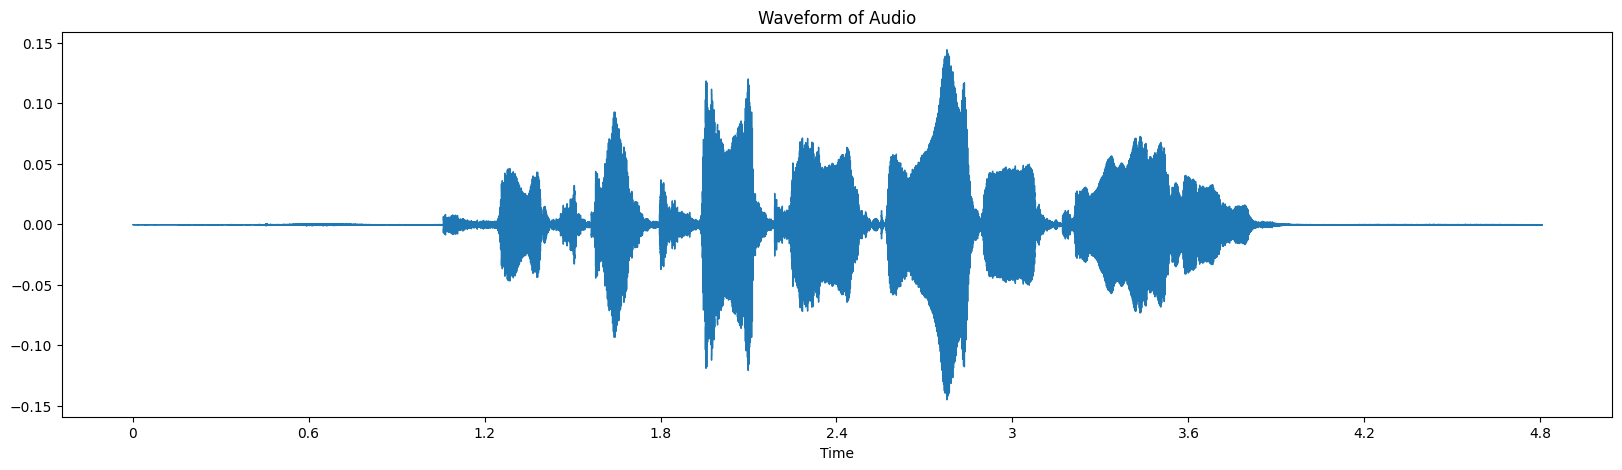

In [ ]:
import matplotlib.pyplot as plt

# Plot the waveform using waveshow
plt.figure(figsize=(20, 5))
librosa.display.waveshow(data, sr=sample_rate)
plt.title('Waveform of Audio')
plt.show()

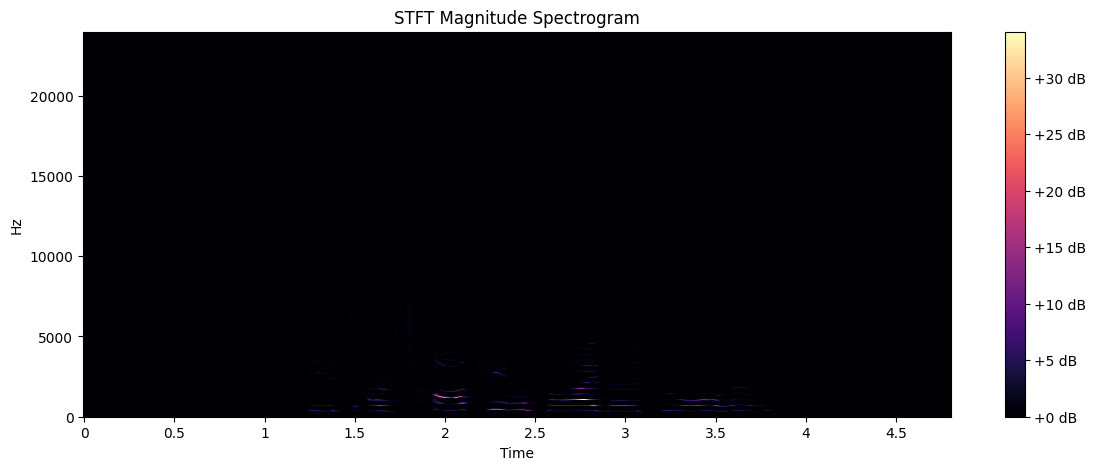

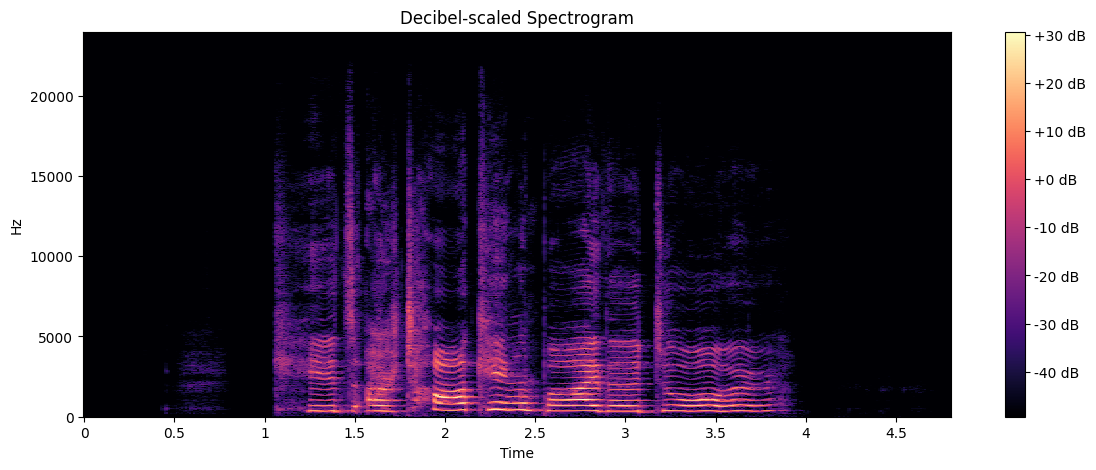

In [ ]:
# Computing the Short-Time Fourier Transform (STFT)
x_stft = librosa.stft(data)

# Converting the amplitude to decibels (log scale)
x_db = librosa.amplitude_to_db(abs(x_stft))

# Plotting the raw STFT spectrogram (not usually done this way, for comparison)
plt.figure(figsize=(14, 5))
librosa.display.specshow(abs(x_stft), sr=sample_rate, x_axis='time', y_axis='hz')
plt.title('STFT Magnitude Spectrogram')
plt.colorbar(format="%+2.0f dB")
plt.show()

# Plotting the decibel-scaled spectrogram (this is the more common visualization)
plt.figure(figsize=(14, 5))
librosa.display.specshow(x_db, sr=sample_rate, x_axis='time', y_axis='hz')
plt.title('Decibel-scaled Spectrogram')
plt.colorbar(format="%+2.0f dB")
plt.show()


Shape of Mel Spectrogram: (128, 451)


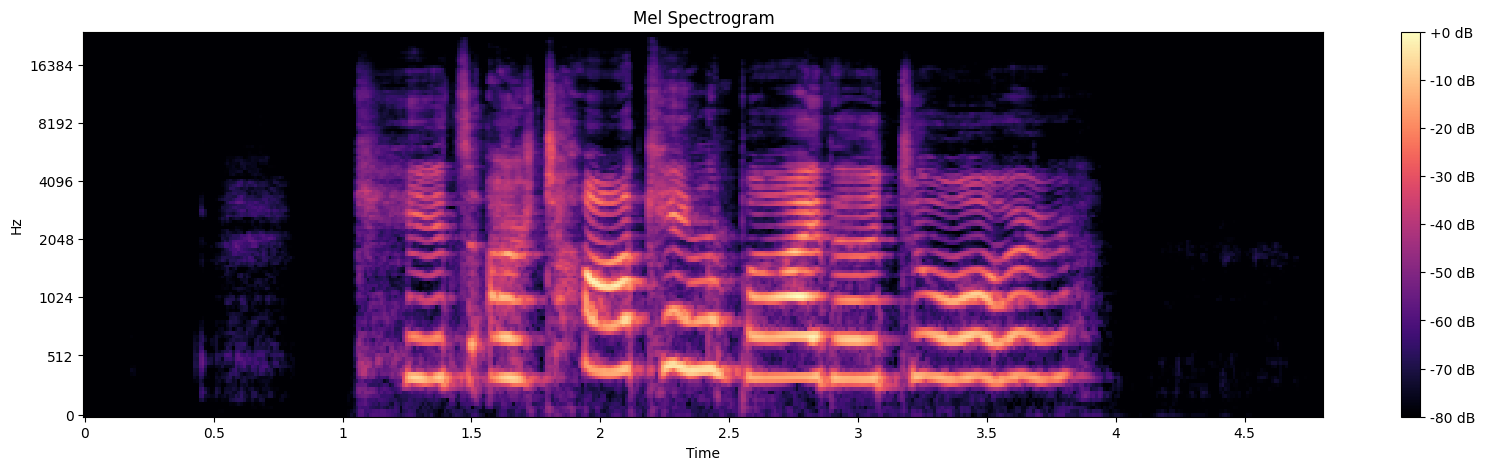

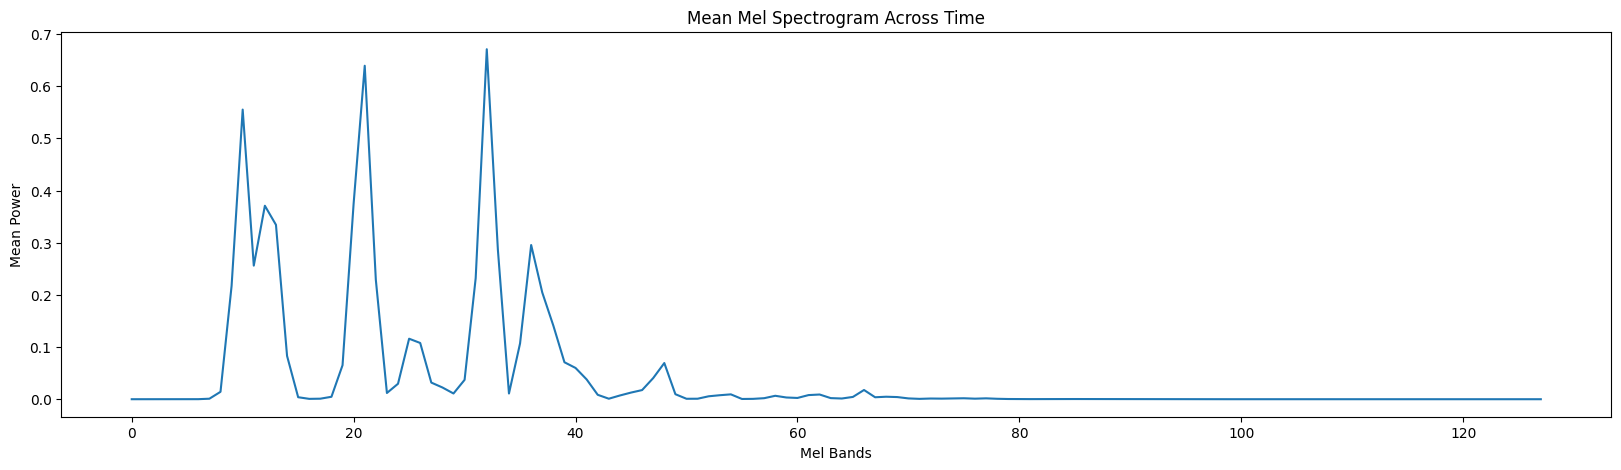

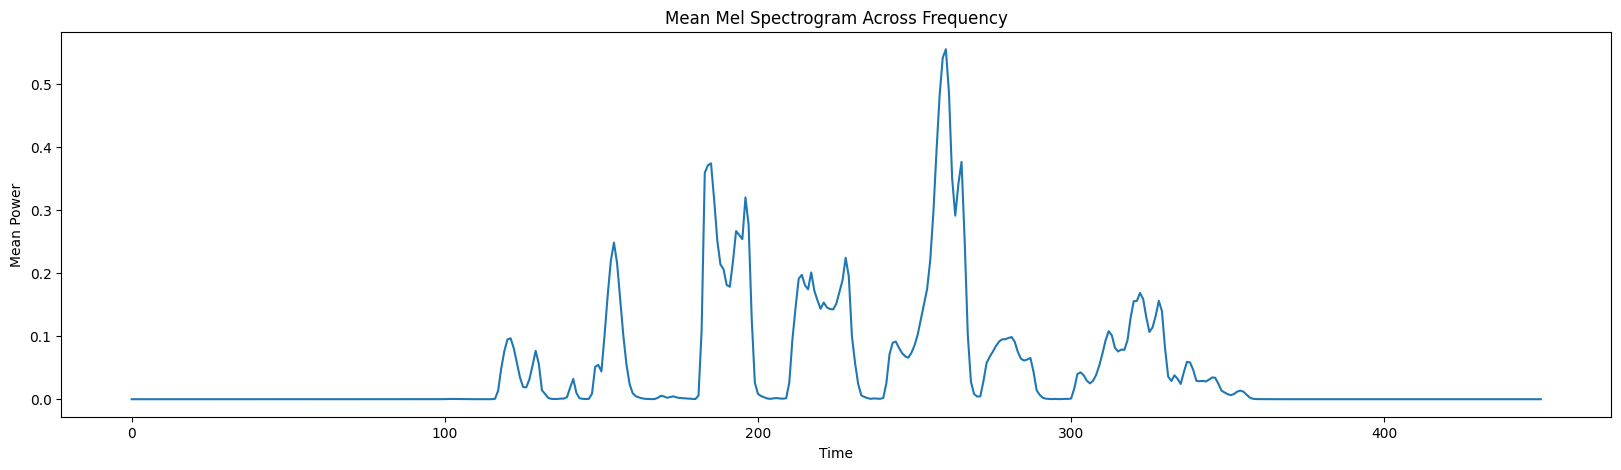

In [ ]:
# Computing a Mel spectrogram
mel_spec = librosa.feature.melspectrogram(y=data, sr=sample_rate)
print('Shape of Mel Spectrogram:', mel_spec.shape)

plt.figure(figsize=(20, 5))
librosa.display.specshow(librosa.power_to_db(mel_spec, ref=np.max),
                         sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.show()

# Ploting the mean of the Mel spectrogram across time (mean per frequency band)
plt.figure(figsize=(20, 5))
plt.plot(np.mean(mel_spec, axis=1))
plt.title('Mean Mel Spectrogram Across Time')
plt.xlabel('Mel Bands')
plt.ylabel('Mean Power')
plt.show()

# Ploting the mean of the Mel spectrogram across frequency (mean per time frame)
plt.figure(figsize=(20, 5))
plt.plot(np.mean(mel_spec, axis=0))
plt.title('Mean Mel Spectrogram Across Frequency')
plt.xlabel('Time')
plt.ylabel('Mean Power')
plt.show()


In [ ]:
# # mel_scpetrogram
# mel_spec = librosa.feature.melspectrogram(data, sr=sample_rate )
# print('shape:', mel_spec.shape)
# plt.figure(figsize=(20, 5))
# librosa.display.specshow(mel_spec, sr=sample_rate, x_axis='time')

# plt.figure(figsize=(20, 5))
# plt.plot(np.mean(mel_spec, axis=0))

# plt.figure(figsize=(20, 5))
# plt.plot(np.mean(mel_spec, axis=1))

In [ ]:
print(f"First 5 filenames: {filenames[:5]}")


First 5 filenames: ['/content/drive/MyDrive/Data/First/Actor_01/03-01-03-02-02-02-01.wav', '/content/drive/MyDrive/Data/First/Actor_01/03-01-04-01-01-01-01.wav', '/content/drive/MyDrive/Data/First/Actor_01/03-01-04-01-02-02-01.wav', '/content/drive/MyDrive/Data/First/Actor_01/03-01-04-01-02-01-01.wav', '/content/drive/MyDrive/Data/First/Actor_01/03-01-04-01-01-02-01.wav']


Shape of MFCCs: (13, 451)


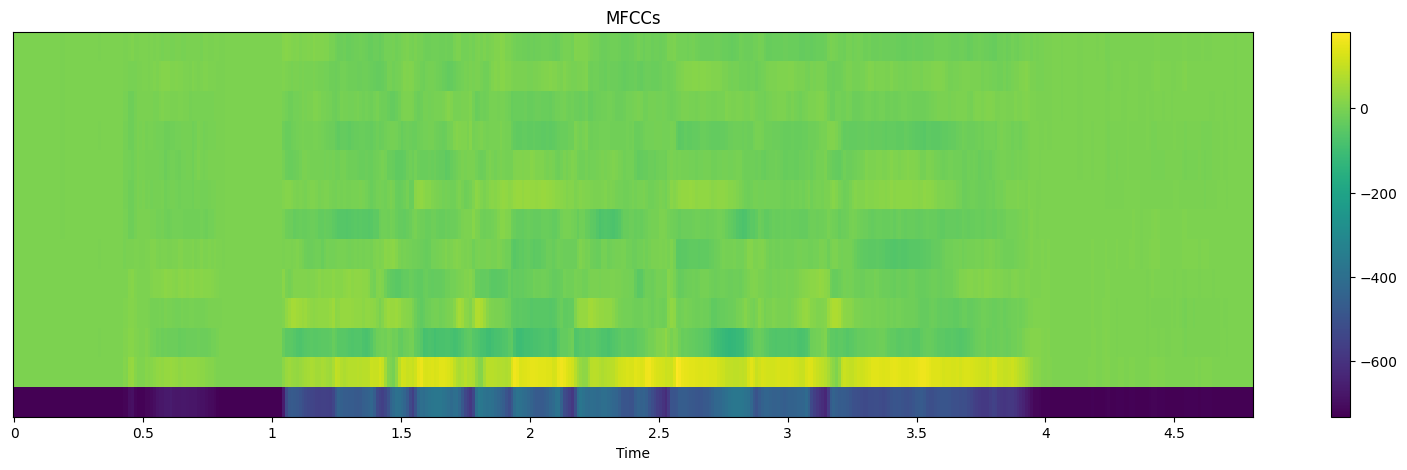

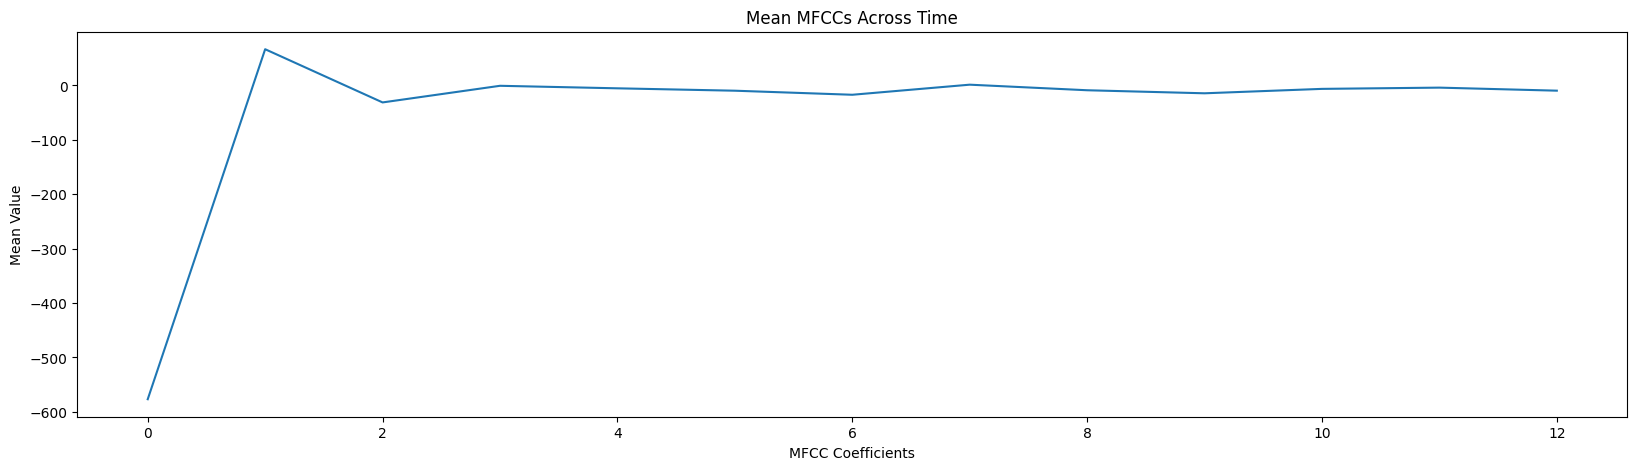

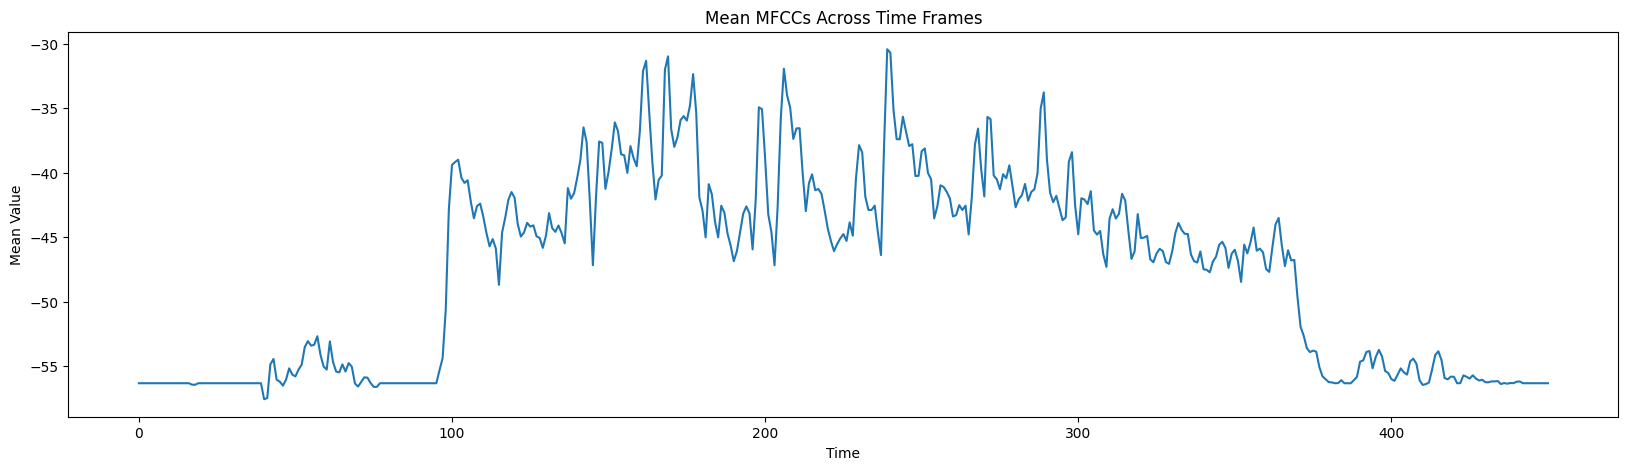

In [ ]:
# MFCCs (Mel-Frequency Cepstral Coefficients)
mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=13)
print('Shape of MFCCs:', mfccs.shape)

# Plot the MFCCs as a spectrogram
plt.figure(figsize=(20, 5))
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time', cmap='viridis')
plt.colorbar()
plt.title('MFCCs')
plt.show()

# Plot the mean of the MFCCs across time (mean per coefficient)
plt.figure(figsize=(20, 5))
plt.plot(np.mean(mfccs, axis=1))
plt.title('Mean MFCCs Across Time')
plt.xlabel('MFCC Coefficients')
plt.ylabel('Mean Value')
plt.show()

# Plot the mean of the MFCCs across coefficients (mean per time frame)
plt.figure(figsize=(20, 5))
plt.plot(np.mean(mfccs, axis=0))
plt.title('Mean MFCCs Across Time Frames')
plt.xlabel('Time')
plt.ylabel('Mean Value')
plt.show()

### FEATURE EXTRACTION

In [ ]:
import librosa
import soundfile as sf
import os, glob, pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [ ]:
file = filenames[0]  # 첫 번째 파일
try:
    with sf.SoundFile(file) as sound_file:
        X = sound_file.read(dtype="float32")
        print(f"데이터 크기: {X.shape}")
except Exception as e:
    print(f"오류 발생: {e}")


데이터 크기: (188989,)


In [ ]:
print(f"First 5 filenames: {filenames[:5]}")


First 5 filenames: ['/content/drive/MyDrive/Data/First/Actor_01/03-01-03-02-02-02-01.wav', '/content/drive/MyDrive/Data/First/Actor_01/03-01-04-01-01-01-01.wav', '/content/drive/MyDrive/Data/First/Actor_01/03-01-04-01-02-02-01.wav', '/content/drive/MyDrive/Data/First/Actor_01/03-01-04-01-02-01-01.wav', '/content/drive/MyDrive/Data/First/Actor_01/03-01-04-01-01-02-01.wav']


In [ ]:
# 증강 함수 정의
def add_white_noise(data, noise_factor=0.005):
    """백색 잡음을 신호에 추가"""
    noise = np.random.randn(len(data))  # noise는 1D 배열로 생성되어야 함
    augmented_data = data + noise_factor * noise  # 차원이 동일한 경우에만 연산
    return augmented_data

def pitch_shift(data, sr, n_steps=2):
    """신호의 피치를 n_steps만큼 시프트"""
    return librosa.effects.pitch_shift(data, sr=sr, n_steps=n_steps)


In [ ]:
import numpy as np
import soundfile as sf
import librosa

def extract_feature(file_name, mfcc=True, mel=True, augment=True, noise_factor=0.005, n_steps=2):
    try:
        with sf.SoundFile(file_name) as sound_file:
            X = sound_file.read(dtype="float32")
            sample_rate = sound_file.samplerate

            # 증강 기법 적용 (선택적으로 사용)
            if augment:
                X = add_white_noise(X, noise_factor=noise_factor)  # 백색 잡음 추가
                X = pitch_shift(X, sr=sample_rate, n_steps=n_steps)  # 피치 시프트 적용

            result = np.array([])

            # 최소 샘플 길이 확인 (너무 짧은 신호는 건너뜀)
            if len(X) < 1000 or np.sum(np.abs(X)) < 1e-3:
                print(f"신호가 너무 짧거나 무음입니다: {file_name}")
                return None

            n_fft = max(512, min(2048, len(X) // 2))

            if X.ndim == 2:
                X = np.mean(X, axis=1)

            # MFCC 추출 및 평균 계산
            if mfcc:
                mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
                result = np.hstack((result, mfccs))

            # Mel-Spectrogram 추출 및 평균 계산
            if mel:
                mel_spectrogram = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate, n_fft=n_fft).T, axis=0)
                result = np.hstack((result, mel_spectrogram))

            return result

    except Exception as e:
        print(f"특징 추출 오류: {e} (파일: {file_name})")
        return None


In [ ]:
print(f"First 5 filenames: {filenames[:5]}")


First 5 filenames: ['/content/drive/MyDrive/Data/First/Actor_01/03-01-03-02-02-02-01.wav', '/content/drive/MyDrive/Data/First/Actor_01/03-01-04-01-01-01-01.wav', '/content/drive/MyDrive/Data/First/Actor_01/03-01-04-01-02-02-01.wav', '/content/drive/MyDrive/Data/First/Actor_01/03-01-04-01-02-01-01.wav', '/content/drive/MyDrive/Data/First/Actor_01/03-01-04-01-01-02-01.wav']


In [ ]:
from collections import Counter

In [ ]:
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}
reverse_emotions = {v:k for k,v in emotions.items()}

# observed_emotions=['calm', 'happy', 'fearful', 'disgust'] // 82
observed_emotions=list(emotions.values())


id_counts = dict(Counter([x.split('/')[-1].split('-')[2] for x in filenames]))
label_counts = {emotions[k]:v for k,v in id_counts.items()}

In [ ]:
print(f"First 5 filenames: {filenames[:5]}")


First 5 filenames: ['/content/drive/MyDrive/Data/First/Actor_01/03-01-03-02-02-02-01.wav', '/content/drive/MyDrive/Data/First/Actor_01/03-01-04-01-01-01-01.wav', '/content/drive/MyDrive/Data/First/Actor_01/03-01-04-01-02-02-01.wav', '/content/drive/MyDrive/Data/First/Actor_01/03-01-04-01-02-01-01.wav', '/content/drive/MyDrive/Data/First/Actor_01/03-01-04-01-01-02-01.wav']


In [ ]:
from tqdm import tqdm
import numpy as np

def load_data(augment=True, noise_factor=0.005, n_steps=2, padding_length=200):
    x = []  # Initialize x as a list
    y = []  # Initialize y as a list
    error_log = []  # 오류 로그 저장

    # 증강 파일 수와 원본 파일 수 초기화
    original_count = 0
    augmented_count = 0

    # tqdm 인스턴스를 한 번만 생성하면서 leave=True와 dynamic_ncols=True 추가
    pbar = tqdm(total=len(filenames) * 2, desc="Processing files", unit="file", leave=True, position=0)

    for file in filenames:
        try:
            file_name = os.path.basename(file)
            emotion = emotions[file_name.split("-")[2]]
            if emotion not in observed_emotions:
                continue

            # 원본 데이터 처리
            feature = extract_feature(file, augment=False)
            if feature is not None:
                # 반복 패딩 적용 (feature 길이가 padding_length보다 작으면 마지막 값을 반복)
                if len(feature) < padding_length:
                    feature = np.pad(feature, (0, padding_length - len(feature)), mode='edge')
                elif len(feature) > padding_length:
                    feature = feature[:padding_length]  # 길이가 너무 길면 잘라내기
                x.append(feature)
                y.append(emotion)
                original_count += 1

            # 진행률 표시줄 업데이트
            pbar.set_postfix({"original": original_count, "augmented": augmented_count}, refresh=False)
            pbar.update(1)

            # 증강 데이터 처리
            if augment:
                feature = extract_feature(file, augment=True, noise_factor=noise_factor, n_steps=n_steps)
                if feature is not None:
                    if len(feature) < padding_length:
                        feature = np.pad(feature, (0, padding_length - len(feature)), mode='edge')
                    elif len(feature) > padding_length:
                        feature = feature[:padding_length]
                    x.append(feature)
                    y.append(emotion)
                    augmented_count += 1

                # 진행률 표시줄 업데이트
                pbar.set_postfix({"original": original_count, "augmented": augmented_count}, refresh=False)
                pbar.update(1)

        except Exception as e:
            error_log.append(f"특징 추출 오류: {e} (파일: {file})")

    pbar.close()

    # 오류 로그 출력
    for error in error_log:
        print(error)

    print("Finished processing files.")

    # 1D 특징 벡터를 2D로 변환
    x = np.array(x)
    y = np.array(y)

    # 1D 벡터를 2D로 재구성
    if x.ndim == 2:  # (samples, feature_length)일 때만 reshape 수행

        # 전체 길이를 기준으로 time_steps와 freq_bins을 자동으로 계산
        total_length = x.shape[1]

        # time_steps를 최소 3 이상으로 설정하여 CNN 커널과 호환되도록 조정
        time_steps = max(3, int(np.sqrt(total_length)))  # 최소 3 이상의 정사각형에 가까운 time_steps 설정
        while total_length % time_steps != 0:
            time_steps -= 1

        freq_bins = total_length // time_steps  # 주파수 축의 크기
        x = x.reshape(-1, time_steps, freq_bins, 1)  # CNN 입력을 위한 4D 형식

    print(f"Final Feature array shape: {x.shape}")
    print(f"Final Number of labels: {len(y)}")

    if x.size == 0 or y.size == 0:
        print("Error: load_data() returned empty arrays.")

    return x, y


In [ ]:
print(f"First 5 filenames: {filenames[:5]}")


First 5 filenames: ['/content/drive/MyDrive/Data/First/Actor_01/03-01-03-02-02-02-01.wav', '/content/drive/MyDrive/Data/First/Actor_01/03-01-04-01-01-01-01.wav', '/content/drive/MyDrive/Data/First/Actor_01/03-01-04-01-02-02-01.wav', '/content/drive/MyDrive/Data/First/Actor_01/03-01-04-01-02-01-01.wav', '/content/drive/MyDrive/Data/First/Actor_01/03-01-04-01-01-02-01.wav']


In [ ]:
!pip install tensorflow
!pip install keras
!pip install tqdm

### KERAS MODEL

In [ ]:
#Keras-tf model MLP with Dense
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import os
from tqdm import tqdm
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix

# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, min_lr=0.001)

In [ ]:
reverse_emotions

{'neutral': '01',
 'calm': '02',
 'happy': '03',
 'sad': '04',
 'angry': '05',
 'fearful': '06',
 'disgust': '07',
 'surprised': '08'}

In [ ]:
!pip install resampy


In [ ]:
data_x, data_y = load_data()

# Check if data_x and data_y are empty
if data_x.size == 0 or data_y.size == 0:
    print("Error: load_data() returned empty arrays.")
    # Investigate why load_data() is not returning any data
    # ...
else:
    print("Feature array shape:", data_x.shape)
    print("Number of labels:", len(data_y))
    print("data_x:", data_x)
    print("data_y:", data_y)

    x_train,x_test,y_train,y_test = train_test_split(data_x, data_y, test_size=0.3, random_state=9)

    # ... rest of the code ...

Processing files:   2%|▏         | 75/4904 [00:50<39:49,  2.02file/s, original=38, augmented=37]

특징 추출 오류: operands could not be broadcast together with shapes (156956,2) (156956,)  (파일: /content/drive/MyDrive/Data/First/Actor_01/03-01-08-01-02-02-01.wav)


Processing files:   4%|▍         | 185/4904 [01:50<54:40,  1.44file/s, original=93, augmented=91]

특징 추출 오류: operands could not be broadcast together with shapes (172972,2) (172972,)  (파일: /content/drive/MyDrive/Data/First/Actor_01/03-01-02-01-01-02-01.wav)


Processing files:   4%|▍         | 206/4904 [02:00<33:34,  2.33file/s, original=103, augmented=101]

특징 추출 오류: Error opening '/content/drive/MyDrive/Data/First/Actor_01/03-01-03-02-02-01-01.wav': Format not recognised. (파일: /content/drive/MyDrive/Data/First/Actor_01/03-01-03-02-02-01-01.wav)
특징 추출 오류: Error opening '/content/drive/MyDrive/Data/First/Actor_01/03-01-03-02-02-01-01.wav': Format not recognised. (파일: /content/drive/MyDrive/Data/First/Actor_01/03-01-03-02-02-01-01.wav)


Processing files:  17%|█▋        | 841/4904 [07:30<54:35,  1.24file/s, original=420, augmented=417]

특징 추출 오류: operands could not be broadcast together with shapes (203403,2) (203403,)  (파일: /content/drive/MyDrive/Data/First/Actor_05/03-01-02-01-02-02-05.wav)


Processing files:  79%|███████▉  | 3895/4904 [33:34<12:53,  1.30file/s, original=1947, augmented=1943]

특징 추출 오류: operands could not be broadcast together with shapes (166566,2) (166566,)  (파일: /content/drive/MyDrive/Data/First/Actor_20/03-01-03-01-02-01-20.wav)


Processing files:  80%|████████  | 3943/4904 [33:55<07:53,  2.03file/s, original=1971, augmented=1966]

특징 추출 오류: operands could not be broadcast together with shapes (209809,2) (209809,)  (파일: /content/drive/MyDrive/Data/First/Actor_20/03-01-06-01-01-02-20.wav)


Processing files:  98%|█████████▊| 4817/4904 [41:28<01:06,  1.30file/s, original=2408, augmented=2402]

특징 추출 오류: operands could not be broadcast together with shapes (229029,2) (229029,)  (파일: /content/drive/MyDrive/Data/First/Actor_24/03-02-01-01-01-01-24.wav)


Processing files: 100%|██████████| 4904/4904 [42:12<00:00,  1.94file/s, original=2451, augmented=2445]

Finished processing files.
Final Feature array shape: (4896, 10, 20, 1)
Final Number of labels: 4896
Feature array shape: (4896, 10, 20, 1)
Number of labels: 4896
data_x: [[[[-5.68138794e+02]
   [ 7.08091736e+01]
   [-8.76022053e+00]
   ...
   [-5.58824825e+00]
   [-1.06571281e+00]
   [-1.95952022e+00]]

  [[-6.81038380e+00]
   [-4.49115181e+00]
   [-1.11215651e+00]
   ...
   [-1.85809886e+00]
   [-2.63279366e+00]
   [-2.17499924e+00]]

  [[ 2.83132540e-05]
   [ 2.40722962e-04]
   [ 3.10244807e-03]
   ...
   [ 2.35869884e-01]
   [ 2.86248565e-01]
   [ 4.98486251e-01]]

  ...

  [[ 1.04484218e-03]
   [ 9.40632075e-04]
   [ 4.65019082e-04]
   ...
   [ 5.74896785e-06]
   [ 5.78835716e-06]
   [ 5.04558648e-06]]

  [[ 3.93517394e-06]
   [ 3.30814646e-06]
   [ 2.50075823e-06]
   ...
   [ 8.10946421e-09]
   [ 8.10946421e-09]
   [ 8.10946421e-09]]

  [[ 8.10946421e-09]
   [ 8.10946421e-09]
   [ 8.10946421e-09]
   ...
   [ 8.10946421e-09]
   [ 8.10946421e-09]
   [ 8.10946421e-09]]]


 [[[-3.697

In [ ]:
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd

def visualize_data(original_data, augmented_data, sr):
    plt.figure(figsize=(12, 6))

    # 원본 데이터 시각화
    plt.subplot(2, 1, 1)
    librosa.display.waveshow(original_data, sr=sr)
    plt.title("Original Audio")

    # 증강된 데이터 시각화
    plt.subplot(2, 1, 2)
    librosa.display.waveshow(augmented_data, sr=sr)
    plt.title("Augmented Audio")

    plt.tight_layout()
    plt.show()

def compare_data_statistics(original_data, augmented_data):
    print("Original Data Statistics")
    print(f"Mean: {original_data.mean()}, Std: {original_data.std()}")

    print("\nAugmented Data Statistics")
    print(f"Mean: {augmented_data.mean()}, Std: {augmented_data.std()}")

def play_audio(data, sr):
    return ipd.Audio(data, rate=sr)


def debug_augmentation(file_name, noise_factor=0.005, n_steps=2):
    with sf.SoundFile(file_name) as sound_file:
        original_data = sound_file.read(dtype="float32")
        sr = sound_file.samplerate

    # 백색 잡음 추가 및 피치 시프트 적용
    augmented_data = add_white_noise(original_data, noise_factor=noise_factor)
    augmented_data = pitch_shift(augmented_data, sr=sr, n_steps=n_steps)

    # 데이터 시각화
    visualize_data(original_data, augmented_data, sr)

    # 데이터 통계적 비교
    compare_data_statistics(original_data, augmented_data)

    # 원본 및 증강된 오디오 재생
    print("Original Audio:")
    play_audio(original_data, sr)

    print("\nAugmented Audio:")
    play_audio(augmented_data, sr)


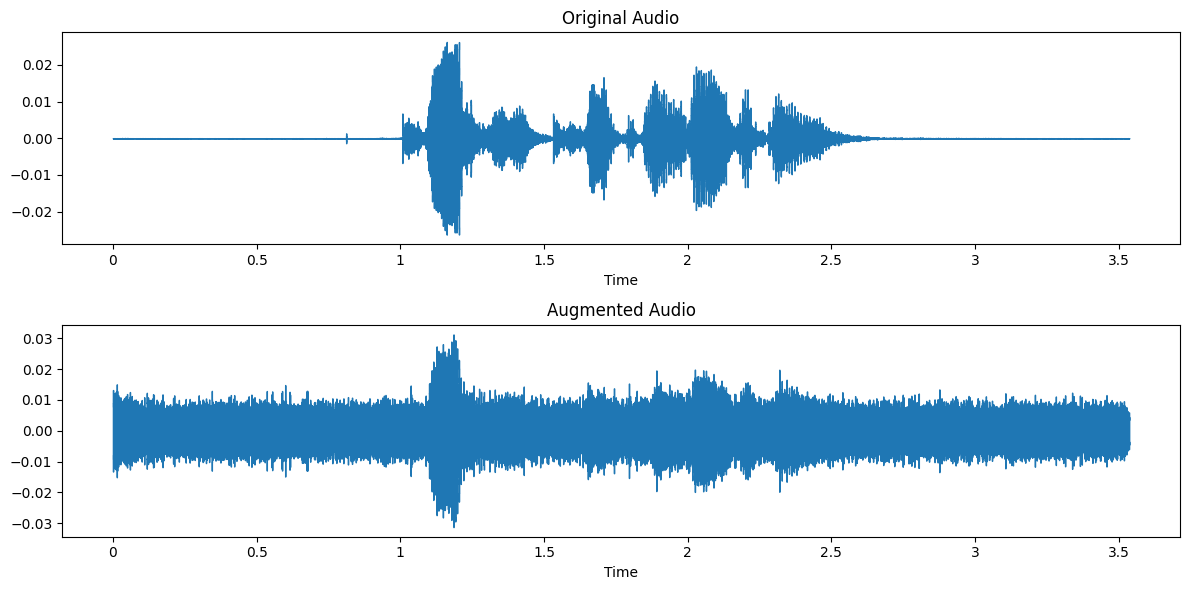

Original Data Statistics
Mean: 8.10894789537997e-07, Std: 0.002956344746053219

Augmented Data Statistics
Mean: -1.3286389315751149e-05, Std: 0.003831173223148162
Original Audio:

Augmented Audio:


In [ ]:
# 파일 경로 지정 (파일 하나를 선택해서 지정합니다)
file_path = '/content/drive/MyDrive/Data/First/Actor_01/03-01-02-01-01-01-01.wav'

# 해당 파일에 증강을 적용하고 결과를 확인
debug_augmentation(file_name=file_path, noise_factor=0.005, n_steps=2)


In [ ]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import numpy as np

# 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3, random_state=9)

# 레이블을 원-핫 인코딩으로 변환
y_train = to_categorical([int(reverse_emotions[x]) - 1 for x in y_train])
y_test = to_categorical([int(reverse_emotions[x]) - 1 for x in y_test])

# CNN 입력에 맞는 4D 형태로 변환 (Conv2D를 위해 차원 확장)
if x_train.ndim == 3:  # (samples, time_steps, freq_bins)일 경우
    x_train = np.expand_dims(x_train, axis=-1)  # (samples, time_steps, freq_bins, 1)
    x_test = np.expand_dims(x_test, axis=-1)

# Conv2D 입력에 맞게 (freq_bins, time_steps, 1) 형태로 변환
x_train = np.transpose(x_train, (0, 2, 1, 3))  # (samples, freq_bins, time_steps, 1)
x_test = np.transpose(x_test, (0, 2, 1, 3))

# Configuration options
num_classes = len(observed_emotions)

# CNN 입력에 맞는 input_shape 설정
input_shape = x_train.shape[1:]  # (freq_bins, time_steps, 1)

# 확인
print("New input_shape:", input_shape)  # 새로운 입력 형태
print("Number of classes:", num_classes)  # 분류할 클래스 수


New input_shape: (20, 10, 1)
Number of classes: 8


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
import numpy as np
from keras.callbacks import ReduceLROnPlateau

# 학습 설정
learning_rate = 0.001  # 학습률 설정
loss_type = 'categorical_crossentropy'  # 다중 클래스 분류 손실 함수
activation_output = 'softmax'  # 출력층 활성화 함수

# 단순화된 CNN 모델 생성
def simplified_cnn_model(num_labels, input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(num_labels, activation=activation_output))
    return model

model = simplified_cnn_model(num_classes, (x_train.shape[1], x_train.shape[2], x_train.shape[3]))

# 옵티마이저 설정
optimizer = Adam(learning_rate=learning_rate, decay=1e-6)

# 모델 컴파일
model.compile(optimizer=optimizer, loss=loss_type, metrics=['accuracy'])

# EarlyStopping 콜백 정의
early_stop_cb = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 학습률 조정 콜백 설정
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',  # 모니터링할 지표
    factor=0.5,          # 학습률 감소 비율 (기존 학습률 * factor)
    patience=5,          # 성능 개선을 기다리는 에포크 수
    min_lr=1e-6,         # 최소 학습률
    verbose=1            # 로그 출력 여부
)

# 모델 훈련
history = model.fit(x_train, y_train,
                    epochs=60,
                    batch_size=64,
                    verbose=1,
                    shuffle=True,
                    validation_split=0.2,
                    callbacks=[early_stop_cb, lr_scheduler])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60


/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 126ms/step - accuracy: 0.1620 - loss: 2.9899 - val_accuracy: 0.2434 - val_loss: 1.8996 - learning_rate: 0.0010
Epoch 2/60
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2650 - loss: 1.9010 - val_accuracy: 0.2697 - val_loss: 1.8077 - learning_rate: 0.0010
Epoch 3/60
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2935 - loss: 1.8071 - val_accuracy: 0.2901 - val_loss: 1.7560 - learning_rate: 0.0010
Epoch 4/60
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3243 - loss: 1.7367 - val_accuracy: 0.3280 - val_loss: 1.7077 - learning_rate: 0.0010
Epoch 5/60
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3313 - loss: 1.7176 - val_accuracy: 0.3309 - val_loss: 1.6516 - learning_rate: 0.0010
Epoch 6/60
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3615 - loss: 1.6475 - val_accuracy: 0.3819 - val_loss: 1.5775 - learning_rate: 0.0010
Epoch 7/60
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3965 - loss: 1.5737 - val_accuracy: 0.3994 -

In [ ]:
# Test the model after training
test_results = model.evaluate(x_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - accuracy: {test_results[1]}%')

y_pred = model.predict(x_test)
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))
print(confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.6299 - loss: 1.0925
Test results - Loss: 1.1963149309158325 - accuracy: 0.6249148845672607%
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
              precision    recall  f1-score   support

           0       0.59      0.47      0.52       109
           1       0.68      0.75      0.71       236
           2       0.72      0.61      0.66       225
           3       0.49      0.57      0.53       206
           4       0.74      0.80      0.77       220
           5       0.64      0.55      0.59       239
           6       0.50      0.55      0.52       121
           7       0.55      0.53      0.54       113

    accuracy                           0.62      1469
   macro avg       0.61      0.60      0.60      1469
weighted avg       0.63      0.62      0.62      1469

[[ 51  14   5  19   0   3  12   5]
 [ 12 178   5  30   0   1  10   0]
 [  5  12 138  10  22  18   6  14]
 [  5  30  11 118   4  24   9   5]
 [  2   2   5   6 176  1

In [ ]:
# 저장 경로 설정
save_path = "/내드라이브/First/Speech/output/keras/keras_model.h5"

# 디렉토리 생성 (필요한 경우)
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# 모델 저장
model.save(save_path)
print(f"Model saved successfully at {save_path}")

Model saved successfully at /내드라이브/First/Speech/output/keras/keras_model.h5


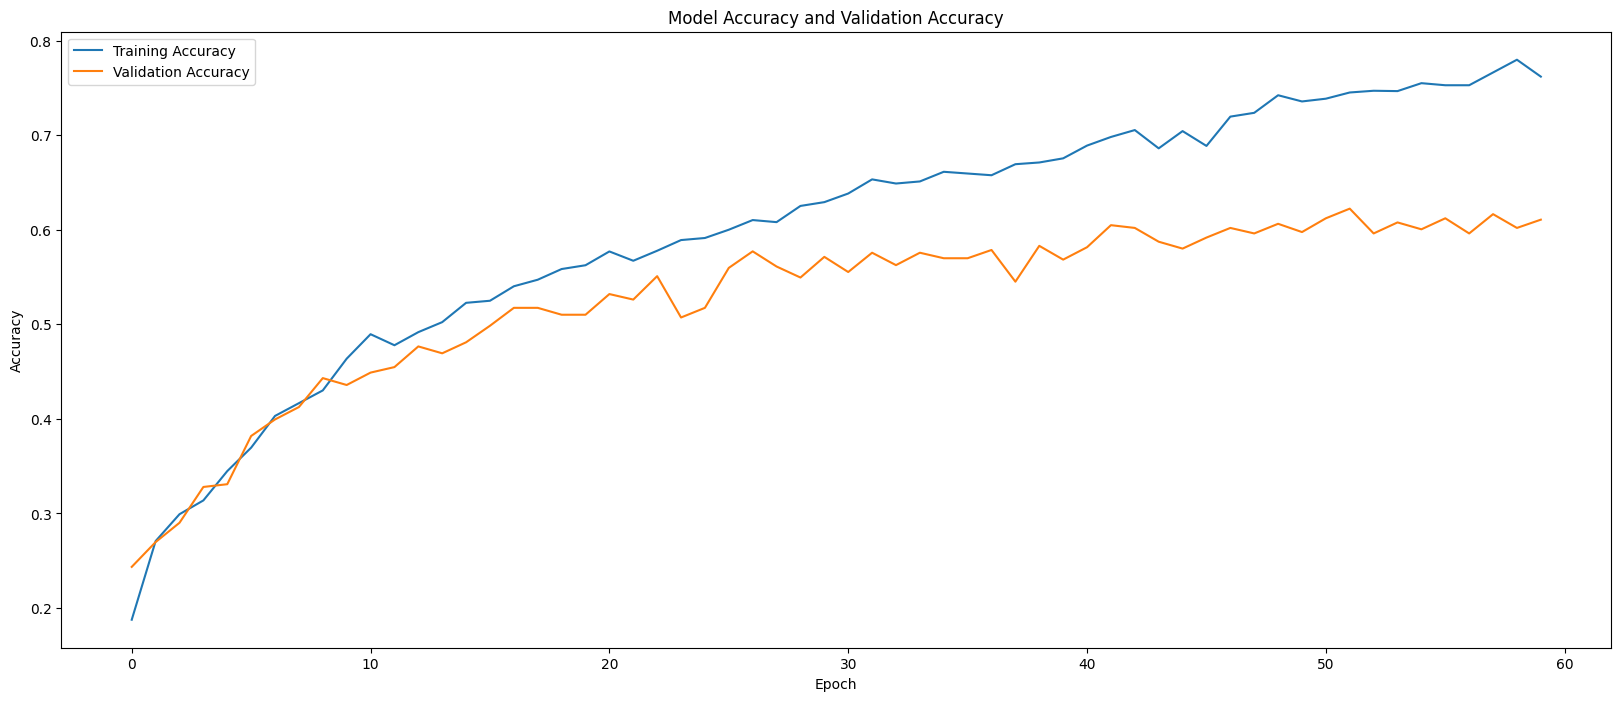

In [ ]:

# Ploting accuracy and validation accuracy
plt.figure(figsize=(20, 8))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Model Accuracy and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


실시간 음성 파일 확인하기

In [ ]:
## 디버깅용 코드임

import numpy as np
import librosa
from sklearn.metrics import classification_report, confusion_matrix

# 감정 매핑 (예시)
EMOTIONS_ID = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '04': 'sad',
    '05': 'angry',
    '06': 'fearful',
    '07': 'disgust',
    '08': 'surprised'
}

# 특징 추출 함수
def extract_features(file_name, n_mfcc=40, padding_length=200):
    """
    음성 파일에서 MFCC 특징을 추출하고 패딩 처리합니다.
    """
    try:
        # 음성 파일 로드
        y, sr = librosa.load(file_name, sr=None)
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
        mfcc_mean = np.mean(mfcc.T, axis=0)

        # 패딩 처리
        if len(mfcc_mean) < padding_length:
            mfcc_mean = np.pad(mfcc_mean, (0, padding_length - len(mfcc_mean)), mode='constant')
        elif len(mfcc_mean) > padding_length:
            mfcc_mean = mfcc_mean[:padding_length]

        return mfcc_mean
    except Exception as e:
        print(f"특징 추출 오류: {e} (파일: {file_name})")
        return None

# 예측 함수
def predict_emotion(model, audio_path):
    """
    음성 파일의 감정을 예측하는 함수
    """
    print(f"Processing audio file: {audio_path}")

    features = extract_features(audio_path)

    if features is not None:
        # features를 (1, 200) 형태로 확장
        features = np.expand_dims(features, axis=0)  # (1, 200)

        # 모델에 입력될 형태로 변환 (배치 크기 1, 각 입력 200 차원)
        features = np.expand_dims(features, axis=-1)  # (1, 200, 1) 형태로 확장

        # 예측 수행
        predictions = model.predict(features)

        # 예측된 감정의 인덱스 추출
        predicted_index = np.argmax(predictions) + 1  # 1부터 시작하는 감정 ID
        predicted_emotion = EMOTIONS_ID.get(f'{predicted_index:02}', 'Unknown')

        print(f"Predicted Emotion: {predicted_emotion}")
        return predicted_emotion
    else:
        print("Feature extraction failed. Check the audio file.")
        return None

# **디버깅 코드 - x_train, y_train 차원 확인**
print("x_train.shape:", x_train.shape)
print("y_train.shape:", y_train.shape)

# **x_train과 y_train의 차원 출력**
# 여기서 x_train과 y_train이 무엇인지 출력하여 데이터가 제대로 준비되었는지 확인
print("x_train data sample:")
print(x_train[0])  # 첫 번째 샘플 출력
print("y_train data sample:")
print(y_train[0])  # 첫 번째 레이블 출력




x_train.shape: (3427, 20, 10, 1)
y_train.shape: (3427, 8)
x_train data sample:
[[[-3.38369284e+02]
  [-1.51308031e+00]
  [ 3.12084590e-04]
  [ 3.16160846e+00]
  [ 2.99919636e+00]
  [ 1.12286841e-01]
  [ 4.44227773e-02]
  [ 1.34394102e-03]
  [ 4.35987685e-04]
  [ 5.42193402e-05]]

 [[ 1.93618636e+01]
  [ 3.56886479e-01]
  [ 3.61901585e-04]
  [ 2.93476996e+00]
  [ 1.03303853e+00]
  [ 9.88039776e-02]
  [ 4.33192181e-02]
  [ 1.63588779e-03]
  [ 4.06268114e-04]
  [ 5.42193402e-05]]

 [[-2.06907452e+01]
  [-2.38694982e+00]
  [ 5.54703348e-04]
  [ 1.71883920e+00]
  [ 6.89935205e-01]
  [ 2.14483982e-01]
  [ 1.66144656e-02]
  [ 1.58277894e-03]
  [ 3.88821020e-04]
  [ 5.42193402e-05]]

 [[-9.53122675e+00]
  [ 1.54703971e+00]
  [ 6.03346860e-04]
  [ 1.54187941e+00]
  [ 9.42861892e-01]
  [ 1.58397078e-01]
  [ 9.64558820e-03]
  [ 1.51377864e-03]
  [ 3.86462815e-04]
  [ 5.42193402e-05]]

 [[-1.12603340e+01]
  [-1.97371160e+00]
  [ 6.62506099e-04]
  [ 7.72495403e+00]
  [ 1.08119205e+00]
  [ 7.0770686

테스트1

In [ ]:
import numpy as np
import librosa

# 감정 매핑 (예시)
EMOTIONS_ID = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '04': 'sad',
    '05': 'angry',
    '06': 'fearful',
    '07': 'disgust',
    '08': 'surprised'
}

# 특징 추출 함수
def extract_features(file_name, n_mfcc=40, target_shape=(20, 10)):
    """
    음성 파일에서 MFCC 특징을 추출하고, 지정된 형태로 크기를 맞춥니다.
    """
    try:
        # 음성 파일 로드
        y, sr = librosa.load(file_name, sr=None)
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)

        # MFCC의 shape 확인
        print(f"MFCC shape: {mfcc.shape}")  # MFCC 배열의 shape 출력

        # MFCC 평균 계산 (시간 축을 기준으로)
        mfcc_mean = np.mean(mfcc.T, axis=0)

        # MFCC 평균 벡터의 크기 확인
        print(f"MFCC mean shape: {mfcc_mean.shape}")  # MFCC 평균 벡터의 shape 출력

        # MFCC 평균 벡터의 길이를 target_shape[0]에 맞게 패딩하거나 자르기
        if len(mfcc_mean) < target_shape[0]:
            mfcc_mean = np.pad(mfcc_mean, (0, target_shape[0] - len(mfcc_mean)), mode='constant')
        elif len(mfcc_mean) > target_shape[0]:
            mfcc_mean = mfcc_mean[:target_shape[0]]

        # MFCC 평균 벡터를 (20, 10) 형태로 변환하기
        # 20개의 값으로 200개의 값으로 확장해야 하므로 20 * 10 = 200 형태로 변환
        mfcc_mean_expanded = np.tile(mfcc_mean, (target_shape[1], 1)).T  # 20개의 벡터를 10번 반복

        # MFCC 평균 벡터의 크기가 (20, 10)인지 확인
        print(f"Reshaped MFCC mean shape: {mfcc_mean_expanded.shape}")  # (20, 10) 형태로 변경된 벡터의 shape 출력

        return mfcc_mean_expanded

    except Exception as e:
        print(f"특징 추출 오류: {e} (파일: {file_name})")
        return None

# 예측 함수
def predict_emotion(model, audio_path):
    """
    음성 파일의 감정을 예측하는 함수
    """
    print(f"Processing audio file: {audio_path}")

    features = extract_features(audio_path)

    if features is not None:
        # features를 (1, 20, 10, 1) 형태로 확장 (배치 크기 1)
        features = np.expand_dims(features, axis=0)  # (1, 20, 10)
        features = np.expand_dims(features, axis=-1)  # (1, 20, 10, 1) 형태로 확장

        # 예측 수행
        predictions = model.predict(features)

        # 예측된 감정의 인덱스 추출
        predicted_index = np.argmax(predictions) + 1  # 1부터 시작하는 감정 ID
        predicted_emotion = EMOTIONS_ID.get(f'{predicted_index:02}', 'Unknown')

        print(f"Predicted Emotion: {predicted_emotion}")
        return predicted_emotion
    else:
        print("Feature extraction failed. Check the audio file.")
        return None

# 예측하려는 오디오 파일 경로
AUDIO_FILE_PATH = "/content/drive/MyDrive/First/Speech/output.wav"

# 예측 수행
predicted_emotion = predict_emotion(model, AUDIO_FILE_PATH)


Processing audio file: /content/drive/MyDrive/First/Speech/output.wav
MFCC shape: (40, 345)
MFCC mean shape: (40,)
Reshaped MFCC mean shape: (20, 10)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 666ms/step
Predicted Emotion: angry


테스트2

In [ ]:
import numpy as np
import librosa

# 감정 매핑 (예시)
EMOTIONS_ID = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '04': 'sad',
    '05': 'angry',
    '06': 'fearful',
    '07': 'disgust',
    '08': 'surprised'
}

# 특징 추출 함수
def extract_features(file_name, n_mfcc=40, target_shape=(20, 10)):
    """
    음성 파일에서 MFCC 특징을 추출하고, 지정된 형태로 크기를 맞춥니다.
    """
    try:
        # 음성 파일 로드
        y, sr = librosa.load(file_name, sr=None)
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)

        # MFCC의 shape 확인
        print(f"MFCC shape: {mfcc.shape}")  # MFCC 배열의 shape 출력

        # MFCC 평균 계산 (시간 축을 기준으로)
        mfcc_mean = np.mean(mfcc.T, axis=0)

        # MFCC 평균 벡터의 크기 확인
        print(f"MFCC mean shape: {mfcc_mean.shape}")  # MFCC 평균 벡터의 shape 출력

        # MFCC 평균 벡터의 길이를 target_shape[0]에 맞게 패딩하거나 자르기
        if len(mfcc_mean) < target_shape[0]:
            mfcc_mean = np.pad(mfcc_mean, (0, target_shape[0] - len(mfcc_mean)), mode='constant')
        elif len(mfcc_mean) > target_shape[0]:
            mfcc_mean = mfcc_mean[:target_shape[0]]

        # MFCC 평균 벡터를 (20, 10) 형태로 변환하기
        # 20개의 값으로 200개의 값으로 확장해야 하므로 20 * 10 = 200 형태로 변환
        mfcc_mean_expanded = np.tile(mfcc_mean, (target_shape[1], 1)).T  # 20개의 벡터를 10번 반복

        # MFCC 평균 벡터의 크기가 (20, 10)인지 확인
        print(f"Reshaped MFCC mean shape: {mfcc_mean_expanded.shape}")  # (20, 10) 형태로 변경된 벡터의 shape 출력

        return mfcc_mean_expanded

    except Exception as e:
        print(f"특징 추출 오류: {e} (파일: {file_name})")
        return None

# 예측 함수
def predict_emotion(model, audio_path):
    """
    음성 파일의 감정을 예측하는 함수
    """
    print(f"Processing audio file: {audio_path}")

    features = extract_features(audio_path)

    if features is not None:
        # features를 (1, 20, 10, 1) 형태로 확장 (배치 크기 1)
        features = np.expand_dims(features, axis=0)  # (1, 20, 10)
        features = np.expand_dims(features, axis=-1)  # (1, 20, 10, 1) 형태로 확장

        # 예측 수행
        predictions = model.predict(features)

        # 예측된 감정의 인덱스 추출
        predicted_index = np.argmax(predictions) + 1  # 1부터 시작하는 감정 ID
        predicted_emotion = EMOTIONS_ID.get(f'{predicted_index:02}', 'Unknown')

        print(f"Predicted Emotion: {predicted_emotion}")
        return predicted_emotion
    else:
        print("Feature extraction failed. Check the audio file.")
        return None

# 예측하려는 오디오 파일 경로
AUDIO_FILE_PATH = "/content/drive/MyDrive/First/Speech/output2.wav"

# 예측 수행
predicted_emotion = predict_emotion(model, AUDIO_FILE_PATH)

Processing audio file: /content/drive/MyDrive/First/Speech/output2.wav
MFCC shape: (40, 345)
MFCC mean shape: (40,)
Reshaped MFCC mean shape: (20, 10)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted Emotion: angry
